## PROJECT NAME -- TELCO COMPANY CUSTOMER SEGMENTATION AND GRWOTH PROJECTION ANALYSIS


SUBMITTED BY -- RAHUL BIRLE

In [1]:
# Importing the necessary libraries and modules for data extraction and visualisation
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_excel(r'telcom_data.xlsx')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## TASK1 : EXPLORATORY DATA ANALYSIS AND USER OVERVIEW ANALYSIS

# TASK 1.1 -- EXPLORATORY DATA ANALYSIS

In [3]:
# Identifying total rows and columns in the dataset
df.shape

(150001, 55)

In [4]:
# Identifying columns with null values
print('Columns and their null value count \n')
for i in df.columns:
    if (df[i].isnull().sum())> 0:
        print( i , '=' , df[i].isnull().sum())

Columns and their null value count 

Start = 1
Start ms = 1
End = 1
End ms = 1
Dur. (ms) = 1
IMSI = 570
MSISDN/Number = 1066
IMEI = 572
Last Location Name = 1153
Avg RTT DL (ms) = 27829
Avg RTT UL (ms) = 27812
Avg Bearer TP DL (kbps) = 1
Avg Bearer TP UL (kbps) = 1
TCP DL Retrans. Vol (Bytes) = 88146
TCP UL Retrans. Vol (Bytes) = 96649
DL TP < 50 Kbps (%) = 754
50 Kbps < DL TP < 250 Kbps (%) = 754
250 Kbps < DL TP < 1 Mbps (%) = 754
DL TP > 1 Mbps (%) = 754
UL TP < 10 Kbps (%) = 792
10 Kbps < UL TP < 50 Kbps (%) = 792
50 Kbps < UL TP < 300 Kbps (%) = 792
UL TP > 300 Kbps (%) = 792
HTTP DL (Bytes) = 81474
HTTP UL (Bytes) = 81810
Activity Duration DL (ms) = 1
Activity Duration UL (ms) = 1
Dur. (ms).1 = 1
Handset Manufacturer = 572
Handset Type = 572
Nb of sec with 125000B < Vol DL = 97538
Nb of sec with 1250B < Vol UL < 6250B = 92894
Nb of sec with 31250B < Vol DL < 125000B = 93586
Nb of sec with 37500B < Vol UL = 130254
Nb of sec with 6250B < Vol DL < 31250B = 88317
Nb of sec with 6250B

## In this project, since we are going to focus on parameters related to data,calling networks,data consumption on different platforms,we are removing those columns which are not relevant for our analysis or have high null values

In [5]:
## Dropping columns with High null values and other columns which are not relevant for our analysis
df.drop(['Bearer Id','Start','Start ms','End','End ms','IMSI','IMEI','Last Location Name','Dur. (ms).1','HTTP DL (Bytes)','HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B','DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B'],axis=1,inplace=True)

[Text(0, 0, 'Google DL (Bytes)'),
 Text(1, 0, 'Youtube DL (Bytes)'),
 Text(2, 0, 'Netflix DL (Bytes)'),
 Text(3, 0, 'Avg RTT UL (ms)')]

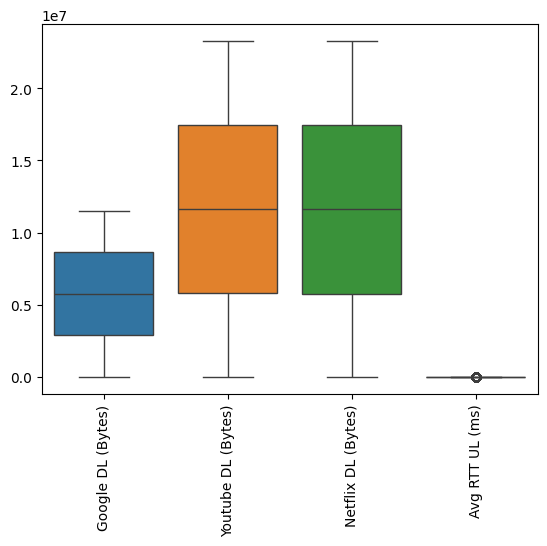

In [6]:
## Identifying outliers through boxplot
box =sns.boxplot(df[['Google DL (Bytes)','Youtube DL (Bytes)','Netflix DL (Bytes)','Avg RTT UL (ms)']])
box.set_xticklabels(box.get_xticklabels(),rotation=90)

In [7]:
# Filling null values in numeric features (except'MSISDN/Number') through mean of the respective column
for i in df.columns.drop('MSISDN/Number'):
    if df[i].dtype!='object':
        df[i].fillna(df[i].mean(),inplace=True)
        

In [8]:
# Filling null values in categorical columns through forward fill method
for i in df.columns:
    if df[i].dtype=='object':
        df[i].fillna(method='ffill',inplace=True)
        

In [9]:
df['MSISDN/Number'].fillna(method='ffill',inplace=True)

In [10]:
# Checking null values again
df.isnull().sum()

Dur. (ms)                      0
MSISDN/Number                  0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Activity Duration DL (ms)      0
Activity Duration UL (ms)      0
Handset Manufacturer           0
Handset Type                   0
Social Media DL (Bytes)        0
Social Media UL (Bytes)        0
Google DL (Bytes)              0
Google UL (Bytes)              0
Email DL (Bytes)               0
Email UL (Bytes)               0
Youtube DL (Bytes)             0
Youtube UL (Bytes)             0
Netflix DL (Bytes)             0
Netflix UL (Bytes)             0
Gaming DL (Bytes)              0
Gaming UL (Bytes)              0
Other DL (Bytes)               0
Other UL (Bytes)               0
Total UL (Bytes)               0
Total DL (Bytes)               0
dtype: int64

In [11]:
# Feature Engineering by adding some new columns representing Total download and upload data
df['Total RTT(ms)'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']
df['Total bearer TP(Kbps)'] =  df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']
df['Total TCP(bytes)'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
df['Total activity dur(ms)'] = df['Activity Duration DL (ms)'] + df['Activity Duration UL (ms)']
df['Total social media(bytes)'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Total google(bytes)'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Total email(bytes)'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Total youtube(bytes)'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Total netflix(bytes)'] =  df['Netflix DL (Bytes)'] +  df['Netflix UL (Bytes)']
df['Total gaming(bytes)'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Total other(bytes)'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']


In [12]:
# Creating a new column 'Total data consumption' representing total data consumption by each user across different platforms

df['Total data consumption'] = df['Total RTT(ms)'] + df['Total bearer TP(Kbps)'] + df['Total TCP(bytes)'] + df['Total activity dur(ms)'] + df['Total social media(bytes)'] + df['Total google(bytes)'] + df['Total email(bytes)'] + df['Total youtube(bytes)'] + df['Total netflix(bytes)'] + df['Total gaming(bytes)'] + df['Total other(bytes)']  

In [13]:
# Dropping old columns after creation of new columns representing total download and upload data

df.drop(['Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Activity Duration DL (ms)','Activity Duration UL (ms)','Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)'],axis=1,inplace=True)

# TASK 1.2 -- USER OVERVIEW ANALYSIS

In [15]:
# Selecting numeric columns from 'df' dataframe to analyse correlation 
num_df = df.select_dtypes(exclude='object')

In [16]:
# Checking correlation of different features with respect to 'Total data consumption
num_df.corr()['Total data consumption'].sort_values(ascending=False)

Total data consumption       1.000000
Total other(bytes)           0.666329
Total gaming(bytes)          0.665405
Total TCP(bytes)             0.332419
Total activity dur(ms)       0.097564
Total bearer TP(Kbps)        0.041257
Total youtube(bytes)         0.023288
Total netflix(bytes)         0.017238
Total social media(bytes)    0.008226
Total google(bytes)          0.007149
Total email(bytes)           0.002904
Dur. (ms)                    0.001093
Total RTT(ms)               -0.002017
MSISDN/Number               -0.003045
Name: Total data consumption, dtype: float64

<Axes: ylabel='Handset Type'>

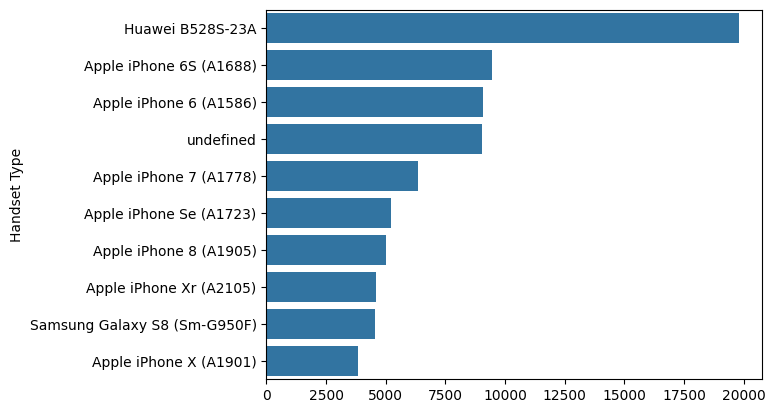

In [17]:
# Top 10 Handsets used by the customers
top_handsets = df['Handset Type'].value_counts().head(10)
plt.figure()
sns.barplot(x=top_handsets.values,y=top_handsets.index)

<Axes: ylabel='Handset Manufacturer'>

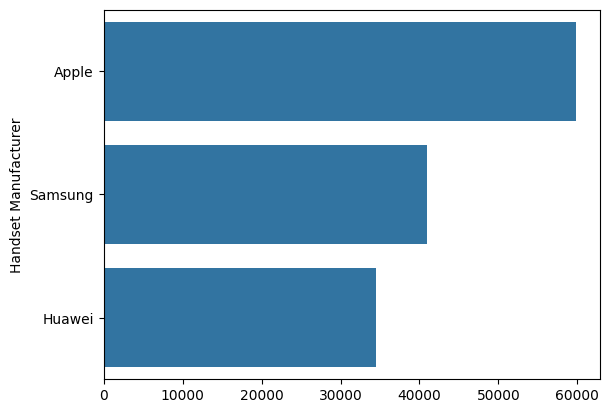

In [18]:

# Top 3 Handset manufacturer
top_manuf = df['Handset Manufacturer'].value_counts().head(3)
plt.figure()
sns.barplot(x=top_manuf.values,y=top_manuf.index)


In [19]:
# Top 5 handsets per top 3 handset manufacturers
top5_list= []
for i in top_manuf.index:
    top5 = df[df['Handset Manufacturer'] == i]['Handset Type'].value_counts().head(5)
    print('Top 5 Handsets for' , i)
    print(top5)
    print('\n')
    top5_list.append(top5)


Top 5 Handsets for Apple
Handset Type
Apple iPhone 6S (A1688)    9452
Apple iPhone 6 (A1586)     9062
Apple iPhone 7 (A1778)     6361
Apple iPhone Se (A1723)    5210
Apple iPhone 8 (A1905)     5027
Name: count, dtype: int64


Top 5 Handsets for Samsung
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4540
Samsung Galaxy A5 Sm-A520F      3736
Samsung Galaxy J5 (Sm-J530)     3704
Samsung Galaxy J3 (Sm-J330)     3494
Samsung Galaxy S7 (Sm-G930X)    3212
Name: count, dtype: int64


Top 5 Handsets for Huawei
Handset Type
Huawei B528S-23A                  19790
Huawei E5180                       2085
Huawei P20 Lite Huawei Nova 3E     2030
Huawei P20                         1482
Huawei Y6 2018                     1002
Name: count, dtype: int64




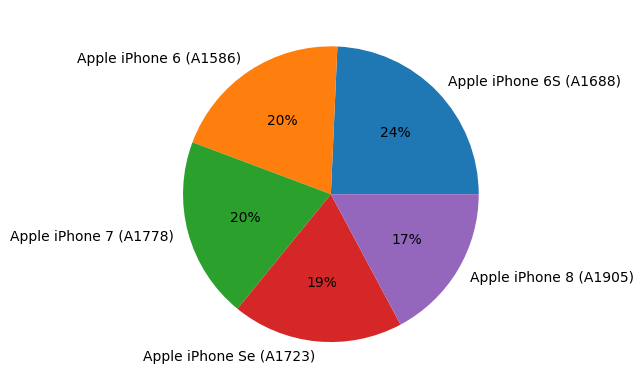

In [20]:
# Visual representation of top 5 handsets of Apple used by the customers
apple_top_handsets = pd.DataFrame({
    'Model':['Apple iPhone 6S (A1688)','Apple iPhone 6 (A1586)','Apple iPhone 7 (A1778)','Apple iPhone Se (A1723)','Apple iPhone 8 (A1905)'],
    'Number of models':[4540,3736,3704,3494,3212]
 })

plt.pie(apple_top_handsets['Number of models'],labels=apple_top_handsets['Model'],autopct='%1.0f%%')
plt.show()

## TASK 2 -- USER ENGAGEMENT ANALYSIS THROUGH DATA VISUALISATION AND CLUSTERING

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '33604515716.0'),
  Text(1, 0, '33614892860.0'),
  Text(2, 0, '33625779332.0'),
  Text(3, 0, '33626320676.0'),
  Text(4, 0, '33627080969.0'),
  Text(5, 0, '33659725664.0'),
  Text(6, 0, '33667163239.0'),
  Text(7, 0, '33675877202.0'),
  Text(8, 0, '33760536639.0'),
  Text(9, 0, '33786323068.0')])

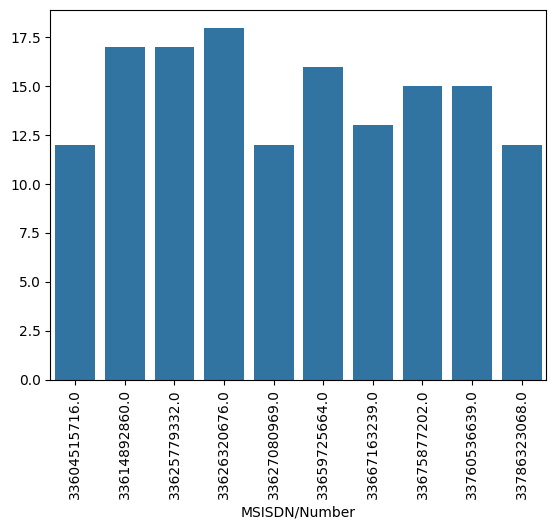

In [21]:
# Top 10 customers using the services of the company most frequently 
most_frequent_customers = df['MSISDN/Number'].value_counts().head(10)
plt.figure()
sns.barplot(x=most_frequent_customers.index,y=most_frequent_customers.values)
plt.xticks(rotation=90)

## Recommendation to the marketing team -- These set of customers are the one's who are most frequently using the services which indicates that they are satisfied by the services hence they should be offerred the existing data plans from the company

Text(0, 0.5, 'Time duration of the customers')

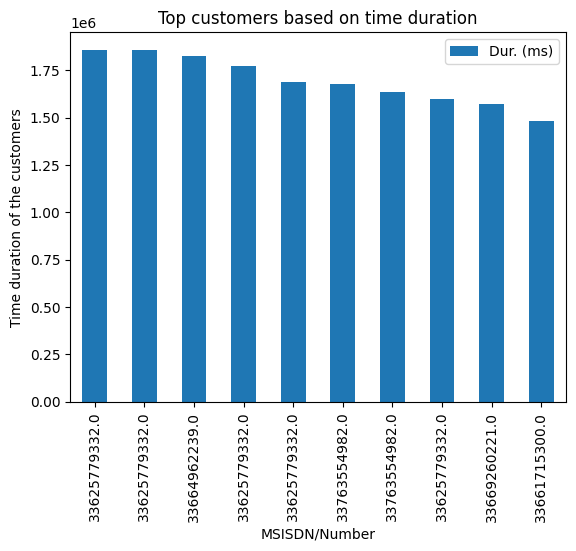

In [25]:
# Top 10 customers based on time duration using our services
top_duration_customer = df.nlargest(10,['Dur. (ms)'])
top_duration_customer = top_duration_customer[['Dur. (ms)','MSISDN/Number']]
top_duration_customer.plot(x='MSISDN/Number',y='Dur. (ms)',kind='bar')
plt.title('Top customers based on time duration')
plt.ylabel('Time duration of the customers')

## Recommendation to the marketing team -- These set of customers are the one's who are spending the most time on our platform which indicates that they are also satisfied by the services hence they should also be offered existing plans based on their requirements such as gaming, social media usage, content consumption on youtube and netflix etc

Text(0, 0.5, 'Data consumed by top 10 customers')

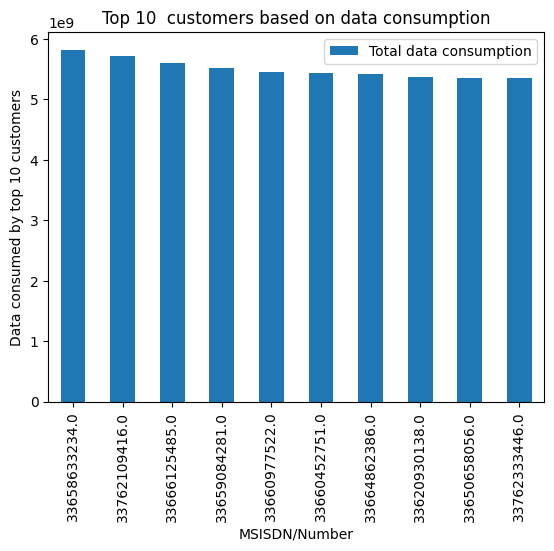

In [26]:
# Top 10 customers based on total data consumption
top_consum = df.nlargest(10,['Total data consumption'])
top_consum = top_consum[['MSISDN/Number','Total data consumption']]

top_consum.plot(x='MSISDN/Number',y='Total data consumption',kind='bar')
plt.title('Top 10  customers based on data consumption')
plt.ylabel('Data consumed by top 10 customers')

## Recommendation to the marketing team -- This set of customers should be offered dedicated high speed data plans meant for High consumption on gaming,netflix etc



Text(0, 0.5, 'Data consumed by top 10 social media users')

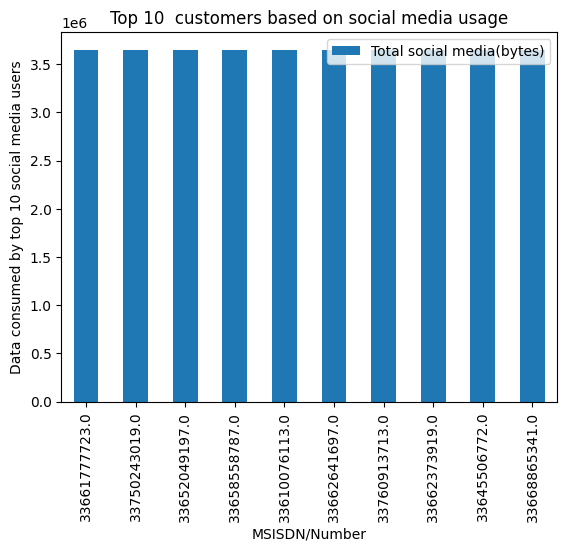

In [27]:
## Top 10 customers using social media 
top_sm = df.nlargest(10,['Total social media(bytes)'])
top_sm = top_sm[['MSISDN/Number','Total social media(bytes)']]

top_sm.plot(x='MSISDN/Number',y='Total social media(bytes)',kind='bar')
plt.title('Top 10  customers based on social media usage')
plt.ylabel('Data consumed by top 10 social media users')

# Recommendation -- This set of customers should be offered regular data plans with normal speed for a good social media using experience

Text(0, 0.5, 'Data consumed by top 10 google users')

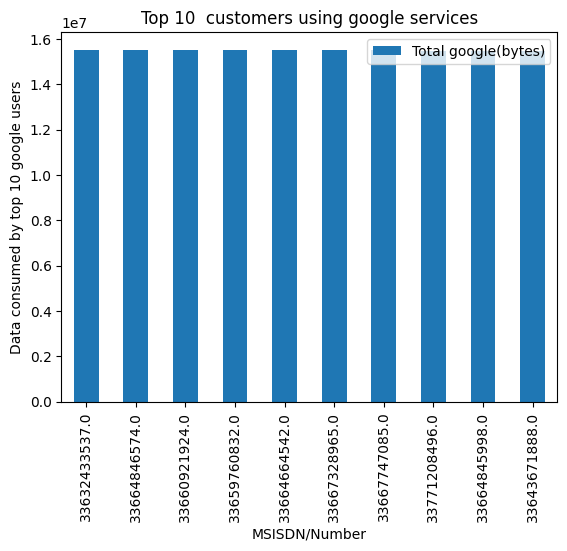

In [29]:

## Top 10 customers using google services or engages in internet surfing 
top_google = df.nlargest(10,['Total google(bytes)'])
top_google = top_google[['MSISDN/Number','Total google(bytes)']]

top_google.plot(x='MSISDN/Number',y='Total google(bytes)',kind='bar')
plt.title('Top 10  customers using google services')
plt.ylabel('Data consumed by top 10 google users')

# Recommendation -- These customers should be offered regular data plans with normal speed for net surfing and related activites

Text(0, 0.5, 'Data consumed by top 10 youtube user')

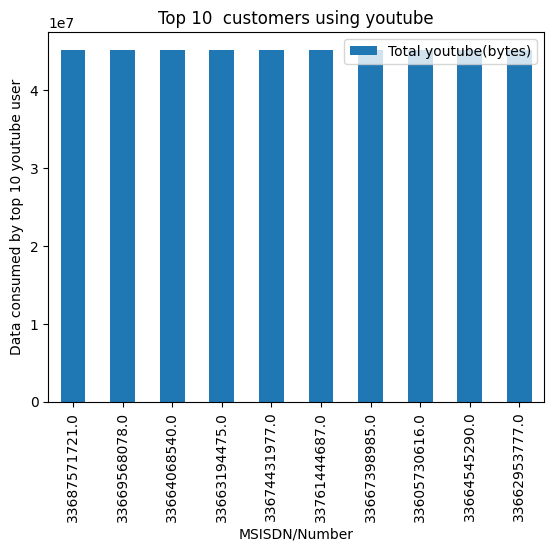

In [30]:

## Top 10 customers using youtube 
top_yt = df.nlargest(10,['Total youtube(bytes)'])
top_yt = top_yt[['MSISDN/Number','Total youtube(bytes)']]

top_yt.plot(x='MSISDN/Number',y='Total youtube(bytes)',kind='bar')
plt.title('Top 10  customers using youtube')
plt.ylabel('Data consumed by top 10 youtube user')

## Recommendation :-
#  This set of customers should be offered dedicated high speed data plans meant for content consumption on youtube,live streaming etc
#  The company can also collaborate with other content creation companies  and send relevant content oriented advertisments to make the user experience better and attract more consumers

Text(0, 0.5, 'Data consumed by top 10 netflix user')

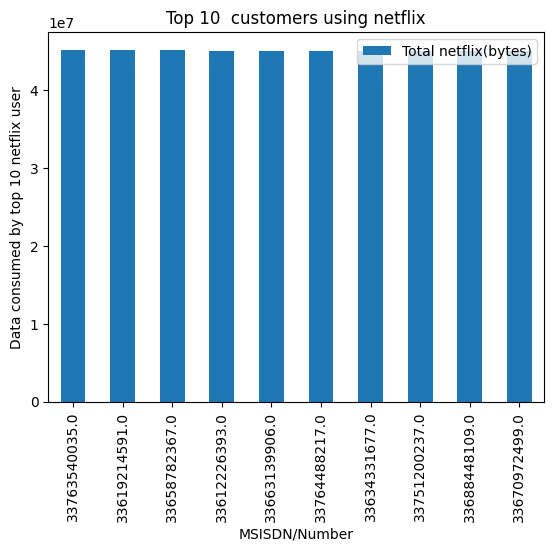

In [31]:

## Top 10 customers using netflix 
top_nf = df.nlargest(10,['Total netflix(bytes)'])
top_nf = top_nf[['MSISDN/Number','Total netflix(bytes)']]

top_nf.plot(x='MSISDN/Number',y='Total netflix(bytes)',kind='bar')
plt.title('Top 10  customers using netflix')
plt.ylabel('Data consumed by top 10 netflix user')

## Recommendation --
# This set of customers should be offered dedicated high speed data plans meant for content consumption on netflix,pamazon prime and other ott platforms
# The company can also collaborate with OTT platforms and send relevant content oriented advertisments so that the viewership of ad supported content goes up


Text(0, 0.5, 'Data consumed by top 10 gamers')

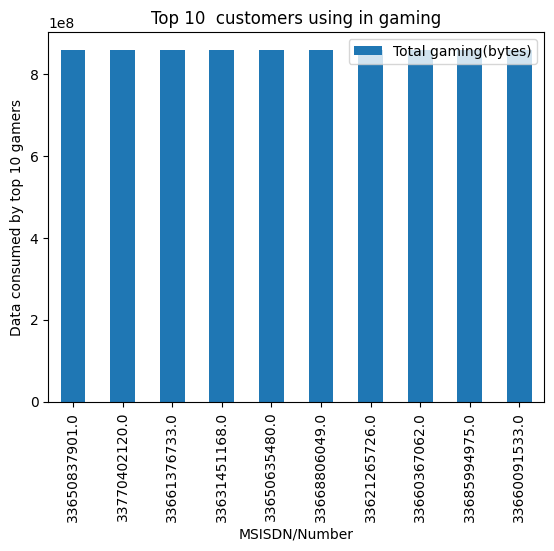

In [32]:

## Top 10 customers engaged in gaming 
top_g = df.nlargest(10,['Total gaming(bytes)'])
top_g = top_g[['MSISDN/Number','Total gaming(bytes)']]

top_g.plot(x='MSISDN/Number',y='Total gaming(bytes)',kind='bar')
plt.title('Top 10  customers using in gaming')
plt.ylabel('Data consumed by top 10 gamers')

# Recommendation:-
# These customers should be offered dedicated high speed data plans for gaming purpose as gaming requires high speed data with large volume
# The company can also promote Cloud gaming activites for these customers in collaboration with gaming companies

Text(0, 0.5, 'Data consumed by top 10 email users')

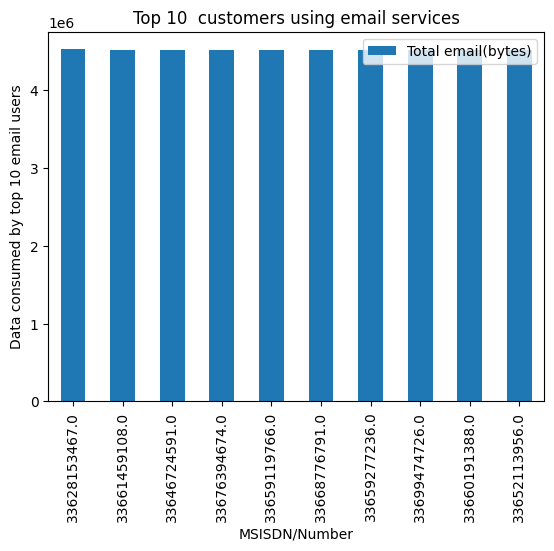

In [33]:

## Top 10 customers using email 
top_em = df.nlargest(10,['Total email(bytes)'])
top_em = top_em[['MSISDN/Number','Total email(bytes)']]

top_em.plot(x='MSISDN/Number',y='Total email(bytes)',kind='bar')
plt.title('Top 10  customers using email services')
plt.ylabel('Data consumed by top 10 email users')

Text(0, 0.5, 'Total data consumption')

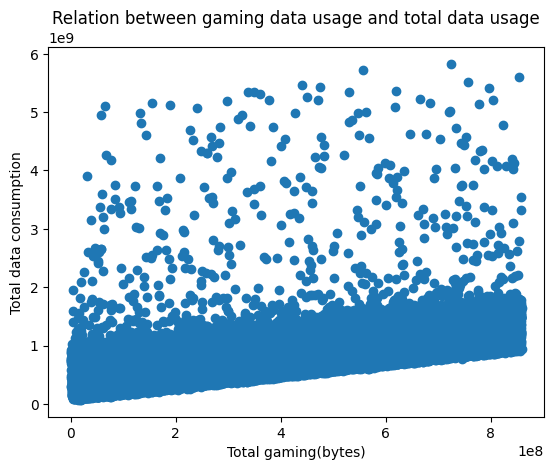

In [34]:
# Checking correlation between data usage for gaming and total data consumption
plt.scatter(df['Total gaming(bytes)'],df['Total data consumption'])
plt.title('Relation between gaming data usage and total data usage')
plt.xlabel('Total gaming(bytes)')
plt.ylabel('Total data consumption')

Text(0, 0.5, 'Total data consumption')

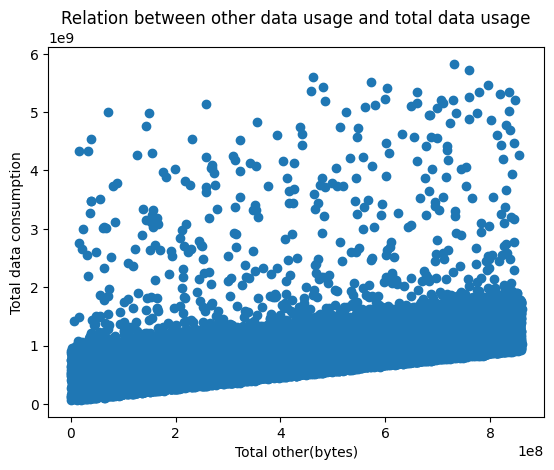

In [35]:
# Checking correlation between data used for other purpose and total data usage
plt.scatter(df['Total other(bytes)'],df['Total data consumption'])
plt.title('Relation between other data usage and total data usage')
plt.xlabel('Total other(bytes)')
plt.ylabel('Total data consumption')

Text(0, 0.5, 'Total data consumption')

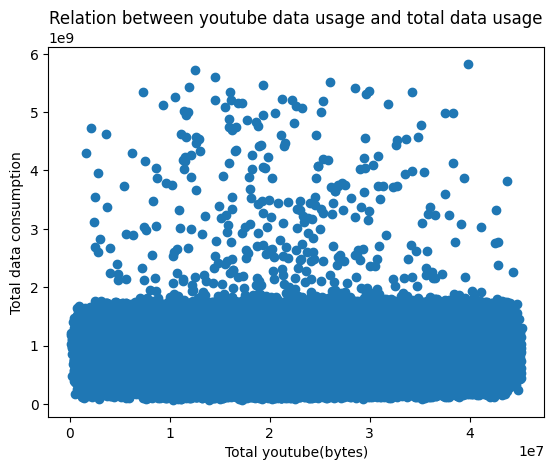

In [36]:
plt.scatter(df['Total youtube(bytes)'],df['Total data consumption'])
plt.title('Relation between youtube data usage and total data usage')
plt.xlabel('Total youtube(bytes)')
plt.ylabel('Total data consumption')

In [37]:
# Calulating Total data consumed by the customers across different platforms
g_total = df['Total gaming(bytes)'].sum()
print('Total data consumed by gaming users is :', g_total,'\n')

yt_total = df['Total youtube(bytes)'].sum()
print('Total data consumed by youtube users is :', yt_total,'\n')

goog_total = df['Total google(bytes)'].sum()
print('Total data consumed by google is :', goog_total,'\n')

nf_total = df['Total netflix(bytes)'].sum()
print('Total data consumed by netflix users is :', nf_total,'\n')

sm_total = df['Total social media(bytes)'].sum()
print('Total data consumed by social media users is :', sm_total,'\n')

em_total = df['Total email(bytes)'].sum()
print('Total data consumed by email users is :', em_total,'\n')

Total data consumed by gaming users is : 64550395439016.7 

Total data consumed by youtube users is : 3396545039272.6387 

Total data consumed by google is : 1171101989130.5457 

Total data consumed by netflix users is : 3394313609363.5386 

Total data consumed by social media users is : 274239359454.20804 

Total data consumed by email users is : 338867605596.30994 



Text(0, 0.5, 'Data consumed by top 3 used services')

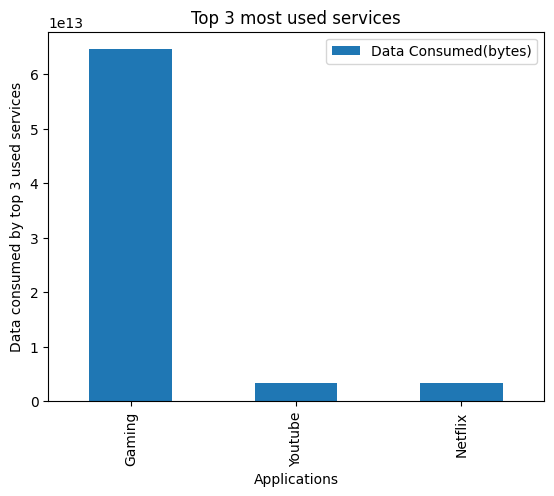

In [38]:
# Identifying top 3 most used application/platforms by the customers
app_data = pd.DataFrame({
    'Applications':['Gaming','Youtube','Google','Netflix','Social Media','Email'],
    'Data Consumed(bytes)':[64550395439016,3396545039272,1171101989130,3394313609363,274239359454,338867605596]
})

app_data = app_data.nlargest(3,['Data Consumed(bytes)'])
app_data.plot(x='Applications',y='Data Consumed(bytes)',kind='bar')
plt.title('Top 3 most used services')
plt.ylabel('Data consumed by top 3 used services')

In [39]:
# Importing necessary modules for scaling and clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [40]:
# Creating a copy of original dataframe 'df' for further usage
df1 = df

In [42]:
# Scaling the values of respective columns before applying clustering
mn = MinMaxScaler()
mn.fit(df1[['Dur. (ms)','Total data consumption']])
df1[['Dur. (ms)','Total data consumption']] = mn.transform(df1[['Dur. (ms)','Total data consumption']])
df1[['Dur. (ms)','Total data consumption']]

,Dur. (ms),Total data consumption
0,0.980734,0.081608
1,0.733164,0.206118
2,0.731360,0.116518
3,0.709627,0.276369
4,0.584100,0.192966
...,...,...
149996,0.040000,0.102057
149997,0.049038,0.238070
149998,0.049189,0.121812
149999,0.049006,0.203024


In [43]:
# Calculating optimum value of clusters through elbow method
listt = []
k_rng = range(1,10)
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(df1[['Dur. (ms)','Total data consumption']])
    listt.append(km.inertia_)

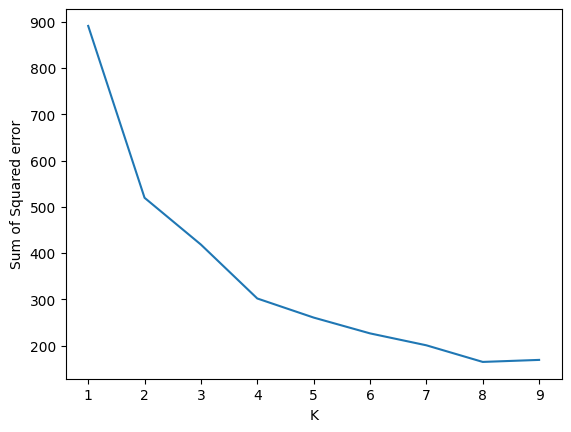

In [44]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng,listt)

## Based on the graphical analysis, taking optimum value of clusters=4

In [45]:
# Applying K means clustering to segment the customers based on respective features
km = KMeans(n_clusters=4)
pred = km.fit_predict(df1[['Dur. (ms)','Total data consumption']])

In [46]:
# Creating a new column representing the 'Engagement cluster' of respective customer
df1['Engagement clusters'] = pred
df.head(2)

,Dur. (ms),MSISDN/Number,Handset Manufacturer,Handset Type,Total RTT(ms),Total bearer TP(Kbps),Total TCP(bytes),Total activity dur(ms),Total social media(bytes),Total google(bytes),Total email(bytes),Total youtube(bytes),Total netflix(bytes),Total gaming(bytes),Total other(bytes),Total data consumption,Engagement clusters
0,0.980734,3.366496e+10,Samsung,Samsung Galaxy A5 Sm-A520F,47.0,67.0,2.156957e+07,76411.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,0.081608,3
1,0.733164,3.368185e+10,Samsung,Samsung Galaxy J5 (Sm-J530),70.0,42.0,2.156957e+07,3728.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,0.206118,3


In [47]:
c1 = df1[df1['Engagement clusters'] == 0]
c2 = df1[df1['Engagement clusters'] == 1]
c3 = df1[df1['Engagement clusters'] == 2]
c4 = df1[df1['Engagement clusters'] == 3]

Text(0, 0.5, 'Total data consumption')

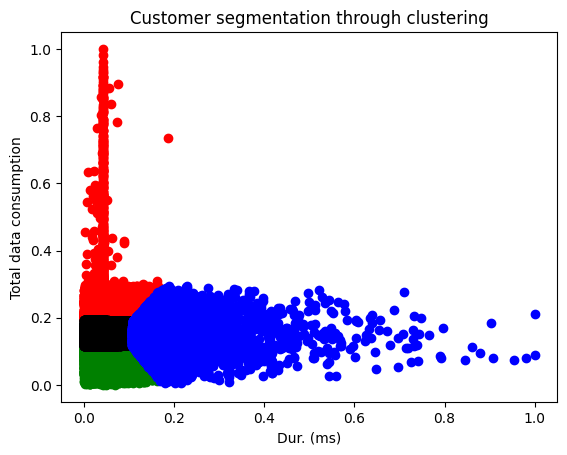

In [49]:
# Visualising the clusters formed
plt.scatter(c1['Dur. (ms)'],c1['Total data consumption'],color='green')
plt.scatter(c2['Dur. (ms)'],c2['Total data consumption'],color='red')
plt.scatter(c3['Dur. (ms)'],c3['Total data consumption'],color='black')
plt.scatter(c4['Dur. (ms)'],c4['Total data consumption'],color='blue')
plt.title('Customer segmentation through clustering')
plt.xlabel('Dur. (ms)')
plt.ylabel('Total data consumption')

## Based on the scatterplot, the best performing clusters in descending order are :
    # 1) c2 (Red cluster)
    # 2) c4 (blue cluster)
    # 3) c3 (black cluster)
    # 4) c1 (green cluster)

In [50]:
# Identifying cluster centers
km.cluster_centers_

array([[0.04599424, 0.0781252 ],
       [0.04697792, 0.23059872],
       [0.04349717, 0.15365056],
       [0.17092646, 0.15031942]])

In [51]:
# Creating a list out of the dataframe for respective columns for calculating engagement score of the customers
dur_list = df1['Dur. (ms)'].tolist()
data_list = df1['Total data consumption'].tolist()

In [52]:
import itertools

In [53]:
# Calculating Engagement score based on eucledian distance between the datapoint and the least engaged cluster
engagement_score = []
for (i,j) in zip(dur_list,data_list):
    d = np.sqrt(np.square(i-0.04596678) + np.square(j-0.07849696))  # Formula for calculating eucledian distance
    engagement_score.append(d)

In [54]:
engagement_list = []
for i in engagement_score:
    i=i*100
    engagement_list.append(i)

In [56]:
# Creating a new column representing Engagement score of the customers

df1['Engagement score'] = engagement_list
df1.head(2)

,Dur. (ms),MSISDN/Number,Handset Manufacturer,Handset Type,Total RTT(ms),Total bearer TP(Kbps),Total TCP(bytes),Total activity dur(ms),Total social media(bytes),Total google(bytes),Total email(bytes),Total youtube(bytes),Total netflix(bytes),Total gaming(bytes),Total other(bytes),Total data consumption,Engagement clusters,Engagement score
0,0.980734,3.366496e+10,Samsung,Samsung Galaxy A5 Sm-A520F,47.0,67.0,2.156957e+07,76411.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,0.081608,3,93.477260
1,0.733164,3.368185e+10,Samsung,Samsung Galaxy J5 (Sm-J530),70.0,42.0,2.156957e+07,3728.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,0.206118,3,69.894728


## TASK 3 -- USER EXPERIENCE ANALYSIS BASED ON CALLING NETWORK PARAMETERS

In [57]:
# Identiying columns to be used for User Experience analysis

df[['Total RTT(ms)','Total bearer TP(Kbps)','Total TCP(bytes)']].head(2)

,Total RTT(ms),Total bearer TP(Kbps),Total TCP(bytes)
0,47.0,67.0,2.156957e+07
1,70.0,42.0,2.156957e+07


In [58]:
# Calculating Average TCP value and % of customers getting TCP network value more than the average 
print('The average TCP network value is :', df['Total TCP(bytes)'].mean(),'bytes','\n')
print('Number of customers receiving TCP network value more than the average value :',df[df['Total TCP(bytes)']>21569572].value_counts().sum(),'\n')
print('Percentage of customers receiving TCP value more than the average value :',(90421/150001)*100,'\n')

The average TCP network value is : 21569572.935152996 bytes 

Number of customers receiving TCP network value more than the average value : 90421 

Percentage of customers receiving TCP value more than the average value : 60.28026479823468 



In [59]:
# Identifying 10 most frequent TCP values received by the customers
df['Total TCP(bytes)'].value_counts().head(10)

Total TCP(bytes)
2.156957e+07    85265
2.081121e+07      650
7.609887e+05      249
2.081124e+07      248
7.596967e+05      136
7.597507e+05      132
2.081123e+07      132
7.623187e+05      121
7.609767e+05      106
2.081257e+07       99
Name: count, dtype: int64

Text(0, 0.5, 'TCP(bytes)')

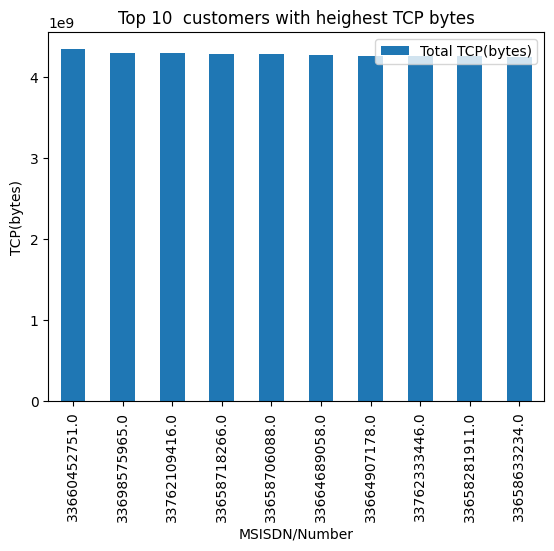

In [67]:
## Identiying Top 10 highest TCP values 
top_tcp = df.nlargest(10,['Total TCP(bytes)'])
top_tcp = top_tcp[['MSISDN/Number','Total TCP(bytes)']]
top_tcp.plot(x='MSISDN/Number',y='Total TCP(bytes)',kind='bar')
plt.title('Top 10  customers with heighest TCP bytes')
plt.xlabel('MSISDN/Number')
plt.ylabel('TCP(bytes)')

In [61]:
# Calculating Average TP value and % of customers getting TP network value more than the average 
print('The average TP network value is :', df['Total bearer TP(Kbps)'].mean(),'bytes','\n')
print('Number of customers receiving TP network value more than the average value :',df[df['Total bearer TP(Kbps)']>15070].value_counts().sum(),'\n')
print('Percentage of customers receiving TP value more than the average value :',(44198/150001)*100,'\n')

The average TP network value is : 15070.474573333331 bytes 

Number of customers receiving TP network value more than the average value : 44198 

Percentage of customers receiving TP value more than the average value : 29.46513689908734 



In [62]:
# Identiying 10 most frequent TP values received by the customers
df['Total bearer TP(Kbps)'].value_counts().head(10)

Total bearer TP(Kbps)
63.0    3886
15.0    3741
97.0    1945
90.0    1885
98.0    1801
96.0    1671
99.0    1571
89.0    1557
91.0    1520
93.0    1491
Name: count, dtype: int64

Text(0, 0.5, 'TP(kbps)')

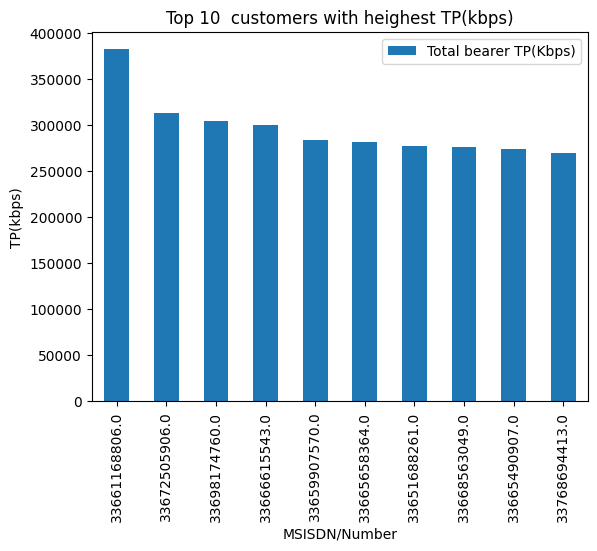

In [69]:
## Top 10 highest TP values 
top_tp = df.nlargest(10,['Total bearer TP(Kbps)'])
top_tp = top_tp[['MSISDN/Number','Total bearer TP(Kbps)']]
top_tp.plot(x='MSISDN/Number',y='Total bearer TP(Kbps)',kind='bar')
plt.title('Top 10  customers with heighest TP(kbps)')
plt.xlabel('MSISDN/Number')
plt.ylabel('TP(kbps)')

In [64]:
# RTT values
print('The average RTT network value is :', df['Total RTT(ms)'].mean(),'ms','\n')
print('Number of customers receiving RTT network value more than the average value :',df[df['Total bearer TP(Kbps)']>127].value_counts().sum(),'\n')
print('Percentage of customers receiving RTT value more than the average value :',(74517/150001)*100,'\n')

The average RTT network value is : 127.45858896466056 ms 

Number of customers receiving RTT network value more than the average value : 74085 

Percentage of customers receiving RTT value more than the average value : 49.67766881554123 



In [65]:
# Top 10 most frequent RTT values
df['Total RTT(ms)'].value_counts().head(10)

Total RTT(ms)
127.458589    27801
29.000000      4993
39.000000      4222
38.000000      2761
40.000000      2647
30.000000      2592
28.000000      2424
49.000000      2219
41.000000      1978
31.000000      1960
Name: count, dtype: int64

In [66]:
## Top 10 highest RTT values 
top_rtt = df.nlargest(10,['Total RTT(ms)'])
top_rtt = top_rtt[['MSISDN/Number','Total RTT(ms)']]
top_rtt

,MSISDN/Number,Total RTT(ms)
30155,3.366232e+10,96924.0
29916,3.366087e+10,64641.0
17894,3.366107e+10,55812.0
5963,3.368369e+10,54848.0
22839,3.376094e+10,27278.0
23442,3.360679e+10,26300.0
1361,3.369855e+10,25922.0
81256,3.367182e+10,25715.0
97312,3.378187e+10,25388.0
100575,3.378401e+10,24738.0


Text(0, 0.5, 'Total data consumption')

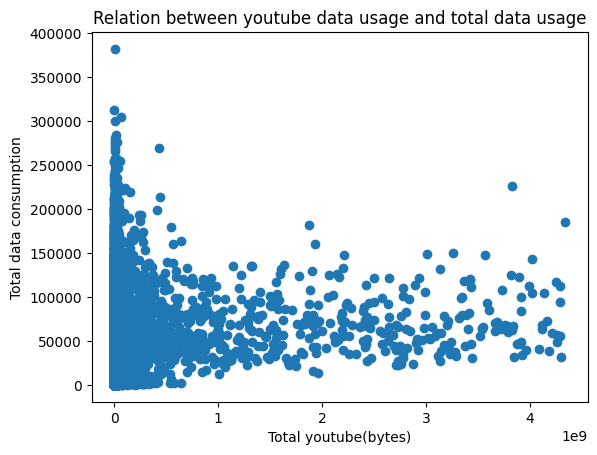

In [73]:
# Correlation between TCP and TP through scatterplot
plt.scatter(df['Total TCP(bytes)'],df['Total bearer TP(Kbps)'])
plt.title('Relation between youtube data usage and total data usage')
plt.xlabel('Total youtube(bytes)')
plt.ylabel('Total data consumption')

In [74]:
# Scaling the values before clustering
mn.fit(df1[['Total TCP(bytes)','Total bearer TP(Kbps)']])
df1[['Total TCP(bytes)','Total bearer TP(Kbps)']] = mn.transform(df1[['Total TCP(bytes)','Total bearer TP(Kbps)']])
df1[['Total TCP(bytes)','Total bearer TP(Kbps)']]

,Total TCP(bytes),Total bearer TP(Kbps)
0,0.004965,0.000175
1,0.004965,0.000110
2,0.004965,0.000039
3,0.004965,0.000230
4,0.004965,0.000039
...,...,...
149996,0.004965,0.000306
149997,0.004965,0.000201
149998,0.004965,0.000235
149999,0.004965,0.000186


In [75]:
# Finding optimum value of clusters through elbow method
list1 = []
k_rng = range(1,10)
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(df1[['Total TCP(bytes)','Total bearer TP(Kbps)']])
    list1.append(km.inertia_)

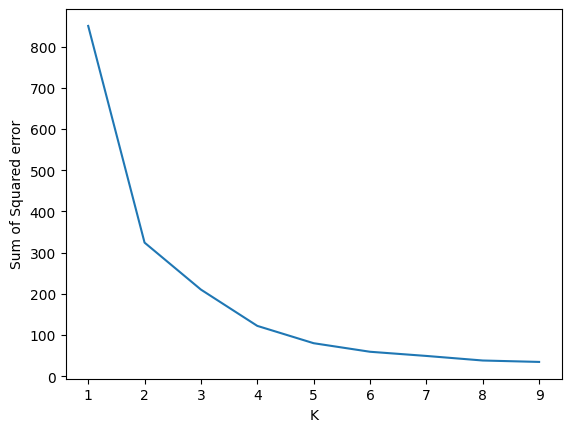

In [76]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng,list1)

## Based on analysis,the optimum value of clusters=4

In [77]:
# Applying clustering on respective columns for customer segmentation
km = KMeans(n_clusters=4)
pred = km.fit_predict(df1[['Total TCP(bytes)','Total bearer TP(Kbps)']])

In [78]:
# Creating new column representing Experience cluster for the users
df1['Experience cluster'] = pred
df1.head(2)

,Dur. (ms),MSISDN/Number,Handset Manufacturer,Handset Type,Total RTT(ms),Total bearer TP(Kbps),Total TCP(bytes),Total activity dur(ms),Total social media(bytes),Total google(bytes),Total email(bytes),Total youtube(bytes),Total netflix(bytes),Total gaming(bytes),Total other(bytes),Total data consumption,Engagement clusters,Engagement score,Experience cluster
0,0.980734,3.366496e+10,Samsung,Samsung Galaxy A5 Sm-A520F,47.0,0.000175,0.004965,76411.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,0.081608,3,93.477260,1
1,0.733164,3.368185e+10,Samsung,Samsung Galaxy J5 (Sm-J530),70.0,0.000110,0.004965,3728.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,0.206118,3,69.894728,1


In [79]:
d1 = df1[df1['Experience cluster'] == 0]
d2 = df1[df1['Experience cluster'] == 1]
d3 = df1[df1['Experience cluster'] == 2]
d4 = df1[df1['Experience cluster'] == 3]

Text(0, 0.5, 'Total bearer TP(Kbps)')

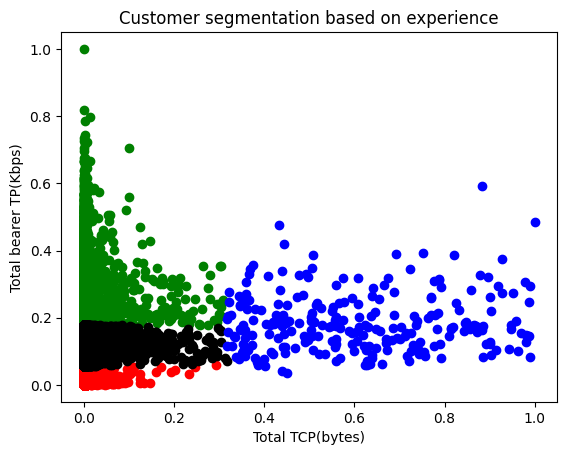

In [80]:
plt.scatter(d1['Total TCP(bytes)'],d1['Total bearer TP(Kbps)'],color='green')
plt.scatter(d2['Total TCP(bytes)'],d2['Total bearer TP(Kbps)'],color='red')
plt.scatter(d3['Total TCP(bytes)'],d3['Total bearer TP(Kbps)'],color='black')
plt.scatter(d4['Total TCP(bytes)'],d4['Total bearer TP(Kbps)'],color='blue')
plt.title('Customer segmentation based on experience')
plt.xlabel('Total TCP(bytes)')
plt.ylabel('Total bearer TP(Kbps)')

## Based on the analysis,best performing clusters in descending order are:
  # (1)- d4 (blue cluster)
  # (2)- d1 (green cluster)
  # (3)- d3 (black cluster)
  # (4)- d2 (red cluster)

In [81]:
# Calculating cluster centers
km.cluster_centers_

array([[0.00557625, 0.25084453],
       [0.0041081 , 0.00547635],
       [0.00302153, 0.10664814],
       [0.61219131, 0.18751493]])

In [82]:
tcp_list = df['Total TCP(bytes)'].tolist()
tp_list = df['Total bearer TP(Kbps)'].tolist()

In [83]:
# Calculating Experience score based on eucledian distance between user datapoint and the worst performing cluster
experience_score = []
for (i,j) in zip(tcp_list,tp_list):
    d = np.sqrt(np.square(i-0.0041081) + np.square(j-0.00547635))
    experience_score.append(d)

In [95]:
experienc_list = []
for i in experience_score:
    i = i*100
    experienc_list.append(i)

In [96]:
# Creating a new column representing Experience score of each customer
df1['Experience score'] = experienc_list
df1.head(2)


,Dur. (ms),MSISDN/Number,Handset Manufacturer,Handset Type,Total RTT(ms),Total bearer TP(Kbps),Total TCP(bytes),Total activity dur(ms),Total social media(bytes),Total google(bytes),Total email(bytes),Total youtube(bytes),Total netflix(bytes),Total gaming(bytes),Total other(bytes),Total data consumption,Engagement clusters,Engagement score,Experience cluster,Experience score
0,0.980734,3.366496e+10,Samsung,Samsung Galaxy A5 Sm-A520F,47.0,0.000175,0.004965,76411.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,0.081608,3,93.477260,1,0.536992
1,0.733164,3.368185e+10,Samsung,Samsung Galaxy J5 (Sm-J530),70.0,0.000110,0.004965,3728.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,0.206118,3,69.894728,1,0.543450


In [102]:
# Calculating Overall satisfaction score of each customer as average of Engagement and Experience score for each user

df1['Satisfaction score'] = df[['Engagement score','Experience score']].mean(axis=1)

In [103]:
df1.head(2)

,Dur. (ms),MSISDN/Number,Handset Manufacturer,Handset Type,Total RTT(ms),Total bearer TP(Kbps),Total TCP(bytes),Total activity dur(ms),Total social media(bytes),Total google(bytes),...,Total youtube(bytes),Total netflix(bytes),Total gaming(bytes),Total other(bytes),Total data consumption,Engagement clusters,Engagement score,Experience cluster,Experience score,Satisfaction score
0,0.980734,3.366496e+10,Samsung,Samsung Galaxy A5 Sm-A520F,47.0,0.000175,0.004965,76411.0,1570185.0,2905912.0,...,18355943.0,17855187.0,292426453.0,180558843.0,0.081608,3,93.477260,1,0.536992,47.007126
1,0.733164,3.368185e+10,Samsung,Samsung Galaxy J5 (Sm-J530),70.0,0.000110,0.004965,3728.0,1933278.0,4414096.0,...,39359124.0,35565545.0,609920783.0,541959383.0,0.206118,3,69.894728,1,0.543450,35.219089


Text(0, 0.5, 'Satisfaction score')

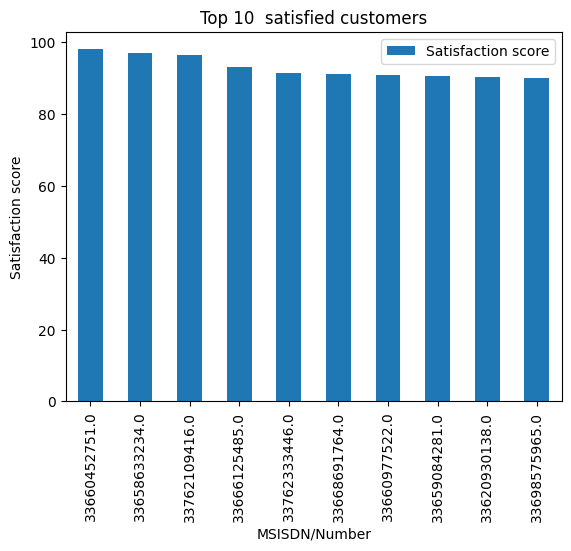

In [104]:
# Visualising top 10 overall satisfied customers using barplot
top_sf = df1.nlargest(10,['Satisfaction score'])
top_sf = top_sf[['MSISDN/Number','Satisfaction score']]
top_sf.plot(x='MSISDN/Number',y='Satisfaction score',kind='bar')
plt.title('Top 10  satisfied customers')
plt.xlabel('MSISDN/Number')
plt.ylabel('Satisfaction score')

In [108]:
# Calculating average satisfaction score and % of customers having satisfaction score more than the average score
print('The average satisfaction score is :', df1['Satisfaction score'].mean(),'\n')
print('Number of customers with satisfaction score more than the average value :',df[df['Satisfaction score']>6.55].value_counts().sum(),'\n')
print('Percentage of customers with satisfaction score more than the average value :',(61390/150001)*100,'\n')


The average satisfaction score is : 6.555219823341139 

Number of customers with satisfaction score more than the average value : 61390 

Percentage of customers with satisfaction score more than the average value : 40.92639382404117 



In [120]:
df.to_csv('Telco customer satisfaction.csv')

## COMPLETED